In [2]:
# Implementation RF in Python
import numpy as np 
import pandas as pd 

RSEED = 50

In [3]:
# Simple problem: two features, two classes
# inventing data
X = np.array([[2,2],
             [2,1],
             [2,3],
             [1,2],
             [1,1],
             [3,3]])

y = np.array([0,1,1,1,0,1])

Text(0.5, 1.0, 'Data')

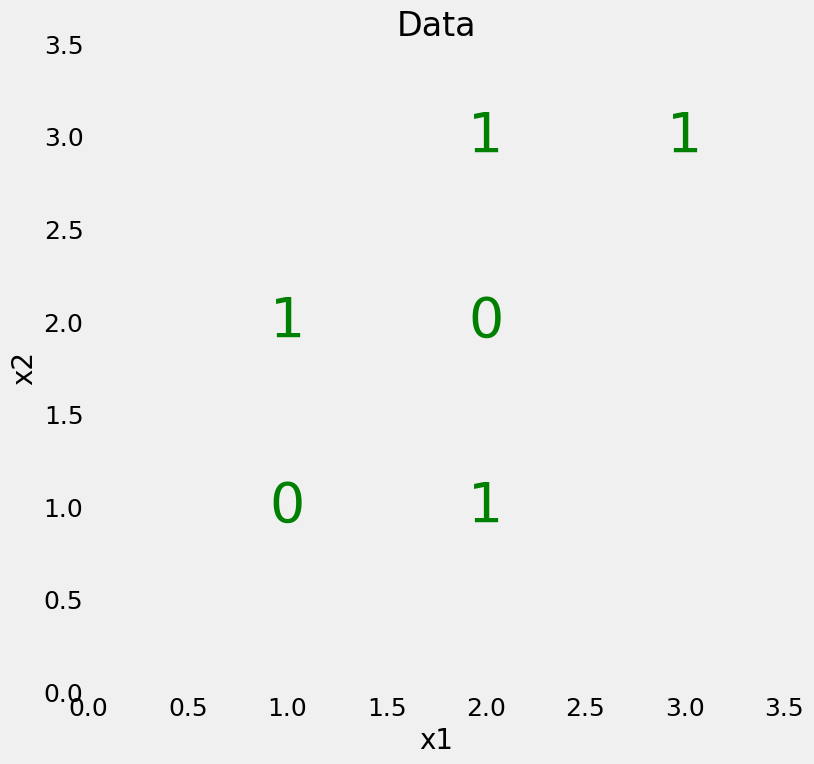

In [4]:

# get a sense of the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18 # globally adjusts the default font size for all text elements in your plots to 18 points. This means that titles, labels, tick labels, and other text components will use this font size unless otherwise specified
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

#### Single decision Tree
 - Scikit-leanr
 - separates the points building a flowchart
 - based on  Gini Impurity
 - default hyperparameters
 - will overfit

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X,y)

DecisionTreeClassifier(random_state=50)

In [6]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


In [7]:
print(f'Model Accuracy: {tree.score(X,y)}')

Model Accuracy: 1.0


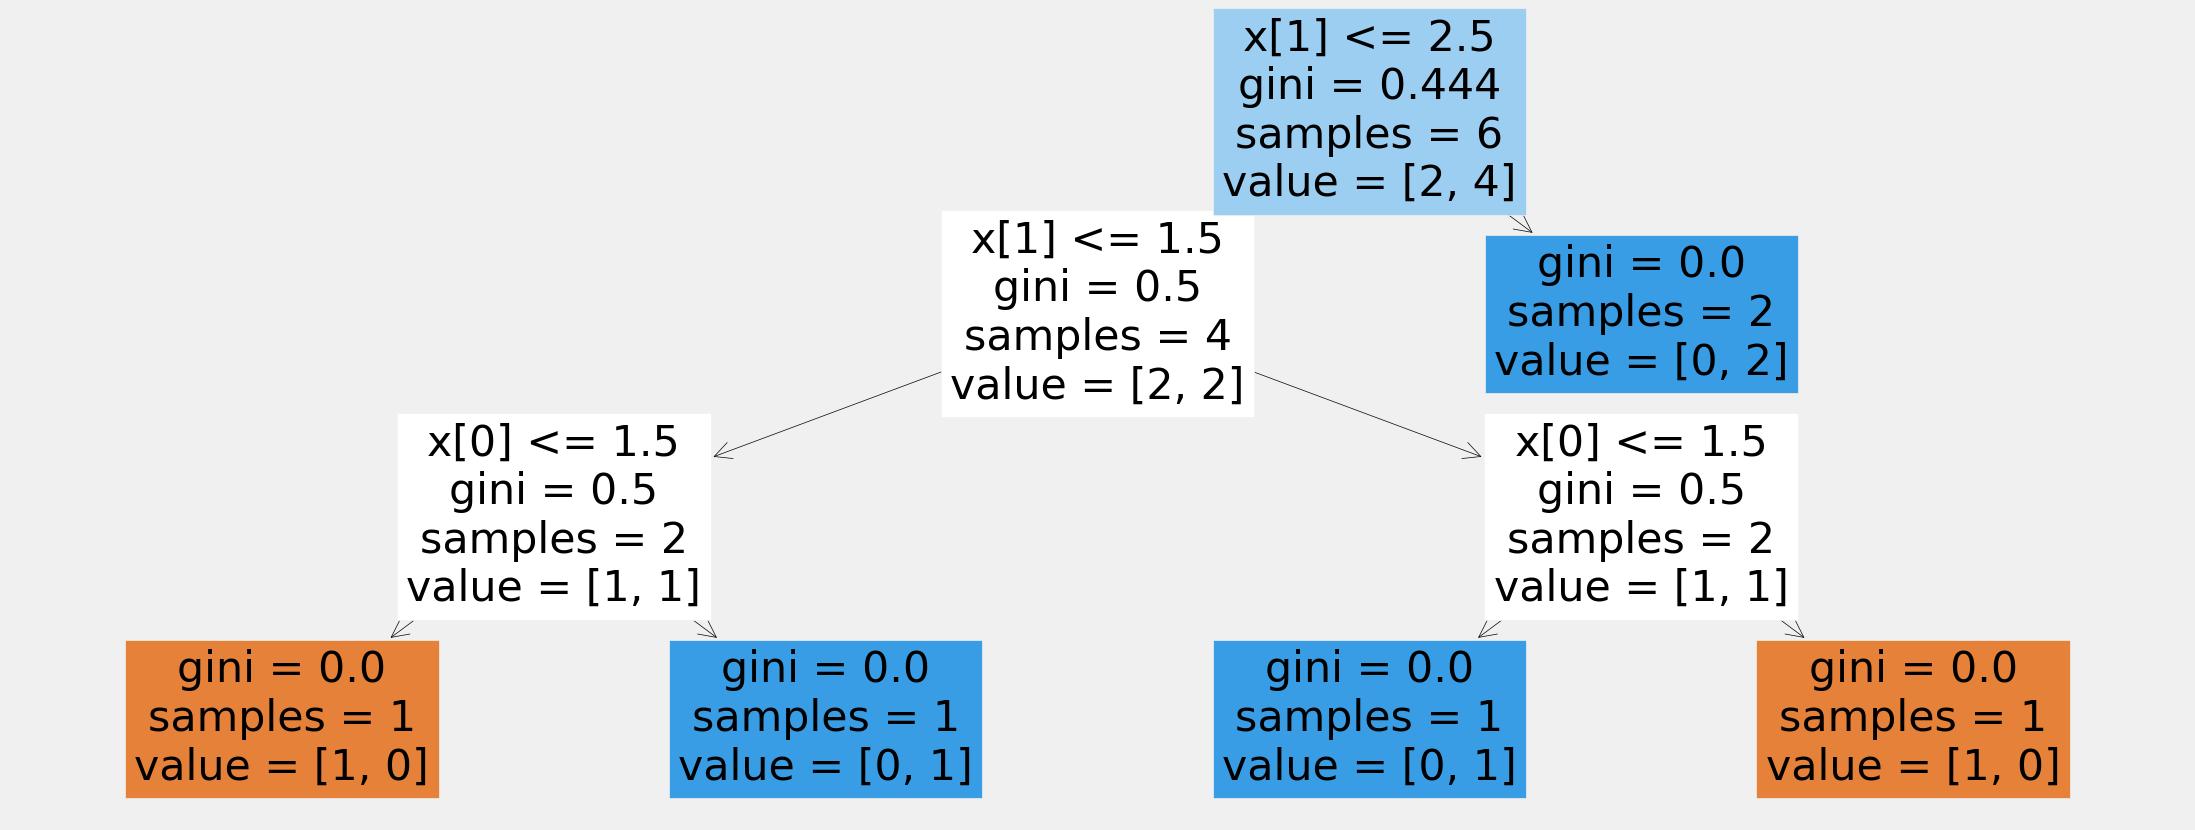

In [8]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,10))
dectree_plot = plot_tree(tree, filled=True)

#### Limit max depth

In [9]:
short_tree = DecisionTreeClassifier(max_depth=2, random_state=RSEED)
short_tree.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=50)

In [10]:
print(f'Model accuracy: {short_tree.score(X,y)}')

Model accuracy: 0.6666666666666666


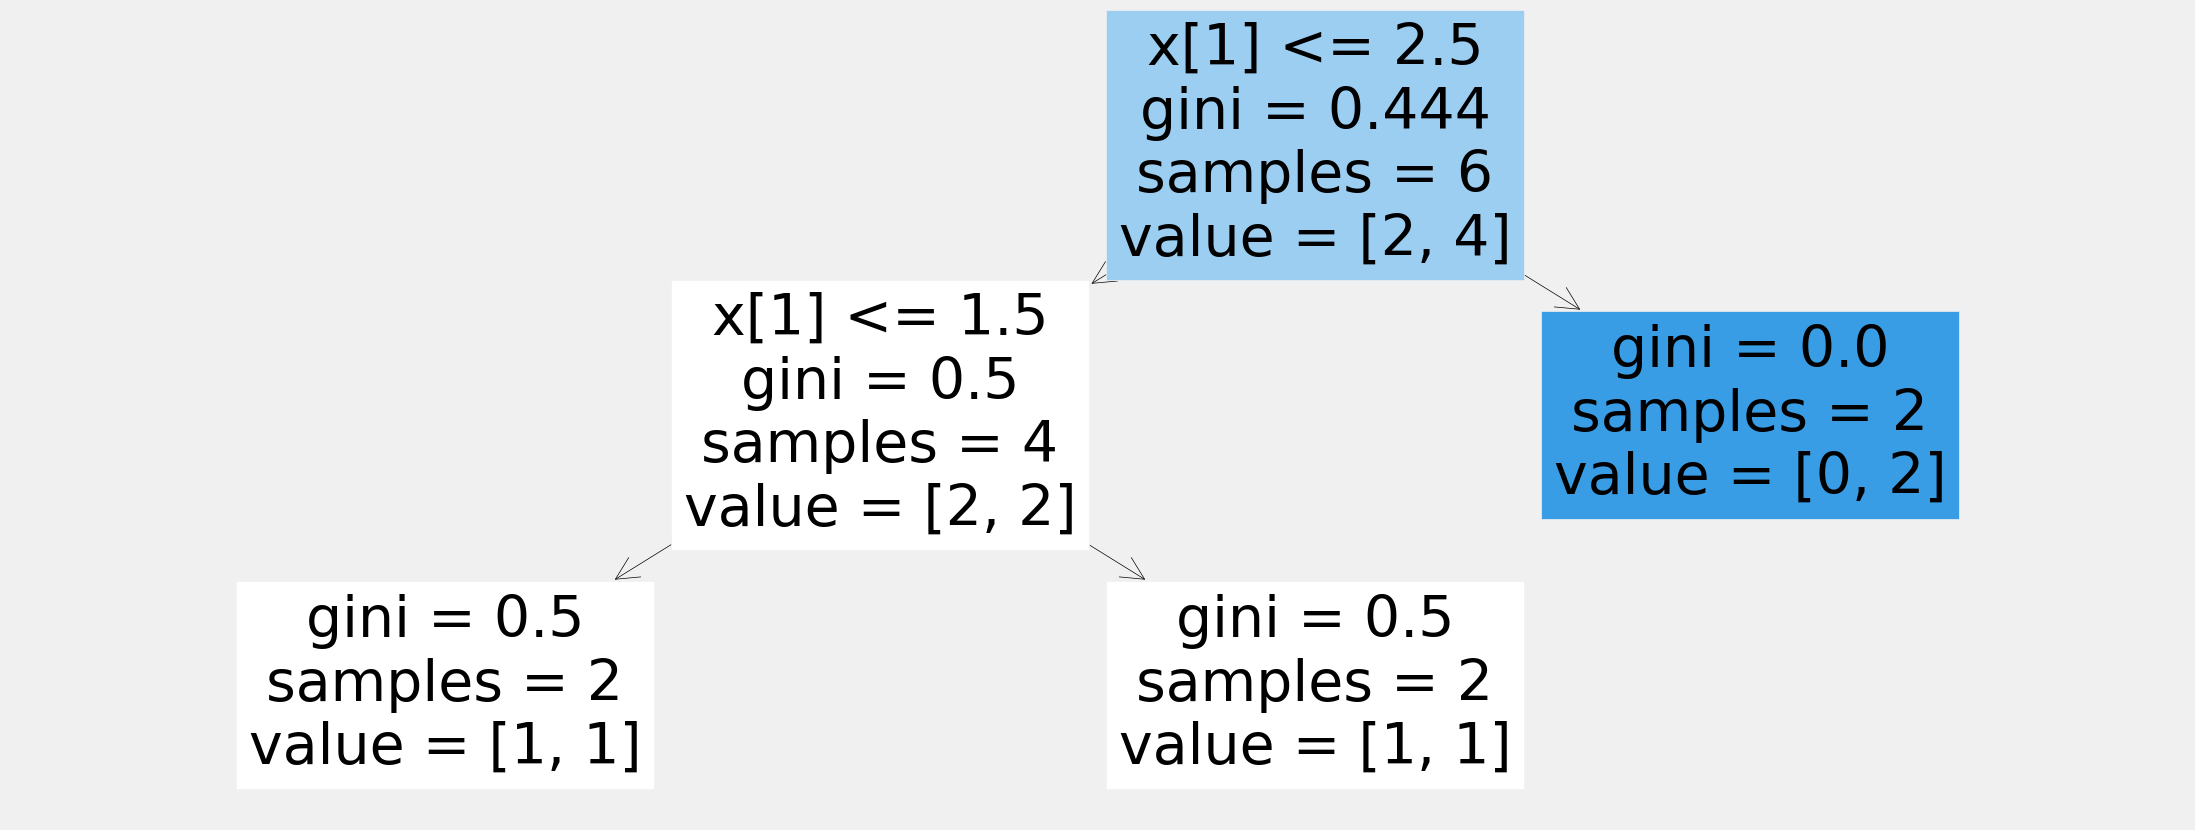

In [11]:
fig = plt.figure(figsize=(25,10))
dectree_plot = plot_tree(short_tree, filled=True)

In [12]:
# bias - avriance trade off

# Forest of trees
 - each one a random subsample of the training data
 - final model take the average

In [13]:
# real dataset

df = pd.read_csv('data/2015.csv').sample(100000, random_state=RSEED)



In [14]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,b'05192015',b'05',b'19',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,b'09232015',b'09',b'23',b'2015',1100.0,2.015005e+09,2.015005e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,b'11052015',b'11',b'05',b'2015',1100.0,2.015011e+09,2.015011e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,b'05112015',b'05',b'11',b'2015',1100.0,2.015004e+09,2.015004e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [15]:
df = df.select_dtypes('number') # Return a subset of the DataFrame's columns based on the column dtypes.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 383119 to 386390
Columns: 323 entries, _STATE to _AIDTST3
dtypes: float64(323)
memory usage: 247.2 MB


In [17]:
# _RFHLTH = adults with good or better health, the values are 1 = Good or better health, 2 = Fair or poor health or 9 = Not sure, refused, etc 
df['_RFHLTH'].value_counts()

_RFHLTH
1.0    81140
2.0    18579
9.0      281
Name: count, dtype: int64

In [18]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2:0}) # target will be 1 for good health, 0 for bad
df = df.loc[df['_RFHLTH'].isin([0,1])].copy() # taking out the 9's
df = df.rename(columns ={'_RFHLTH': 'label'})
df['label'].value_counts()


label
1.0    81140
0.0    18579
Name: count, dtype: int64

In [19]:
# imbalanced target class

In [20]:

# Below, we drop a number of columns that we should not use for modeling (they are different versions of the labels).
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [21]:
# split into train ans test
from sklearn.model_selection import train_test_split
labels = np.array(df.pop('label'))
train, test, train_labels, test_labels = train_test_split(df, labels, stratify=labels, test_size=0.3, random_state=RSEED)

In [22]:
missing_values = train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
columns_with_missing

CTELENUM    29565
PVTRESD1    29565
COLGHOUS    69797
STATERES    29565
CELLFON3    29565
            ...  
_LMTWRK1      472
_LMTSCL1      472
_FLSHOT6    44933
_PNEUMO2    44933
_AIDTST3     6897
Length: 231, dtype: int64

In [23]:
# A lot of missing values
#  fill missing values with mean???
train = train.fillna(train.mean())
test = test.fillna(train.mean())

features = list(train.columns)

In [24]:
train.shape

(69803, 313)

In [25]:
test.shape

(29916, 313)

In [26]:
tree.fit(train, train_labels) # Simple decision tree on real data
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 12327 nodes with maximum depth 55.


In [27]:
# make probability predictions
train_probs = tree.predict_proba(train)[:,1]
probs = tree.predict_proba(test)[:,1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [28]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC Score: 0.6763951863200912


In [30]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels,[1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


In [31]:
# Evaluate simple decisioon tree
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [32]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))


Counter({1.0: 24136, 0.0: 5780})
Counter({1.0: 24136, 0.0: 5780})


Recall Baseline: 1.0 Test: 0.87 Train: 1.0
Precision Baseline: 0.81 Test: 0.88 Train: 1.0
Roc Baseline: 0.5 Test: 0.68 Train: 1.0


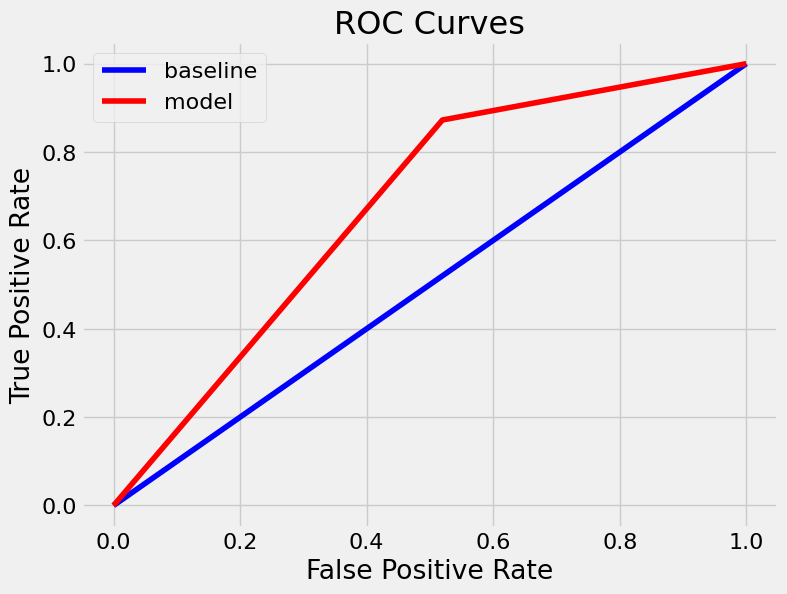

In [33]:
evaluate_model(predictions, probs, train_predictions, train_probs)